Impoorting the required modules for analysing the data

In [1]:
# import modules
import pandas as pd
import numpy as np
import csv
from numpy import array, arange, pi, exp, sin, cos, polyfit, poly1d, linspace, zeros, flipud
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import scipy
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy.optimize import fmin
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,8)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

Note: The data Collected from the Xray difractometer(X-pert Data Collector) has some setting in the beggining and it is impossible to directly apply it here. I had not yet figured how to do it with that setting yet by the time i wrote this analysis. 
I did some pre-data analysis process by conveting the csv data collected to an excel where where I cut the rows which don't contain the data I needed.
After doing this the rest is pretty easy to follow. 

In [73]:
#We'll use pandas to load an Excel file. Pandas is very smart at this.
NaCl_df = pd.read_csv('SodiamBromide102622.csv', header=27)
print(NaCl_df[0:2])
#NaCl_df = pd.read_excel('NaCl.xlsx') #  used NaCl_df to show that we are dealing with data frames. it can be any salt that you are dealing with.

   Angle  Intensity
0  20.01       31.0
1  20.02       33.0


For simplicity of not having to change everything later on for each salt you are analysing, I create a dummy valiable Salt_df to equal whatever salt you are analysing. you won't need to change much going forward unless i not otherwise.

In [74]:
Salt_df = NaCl_df 

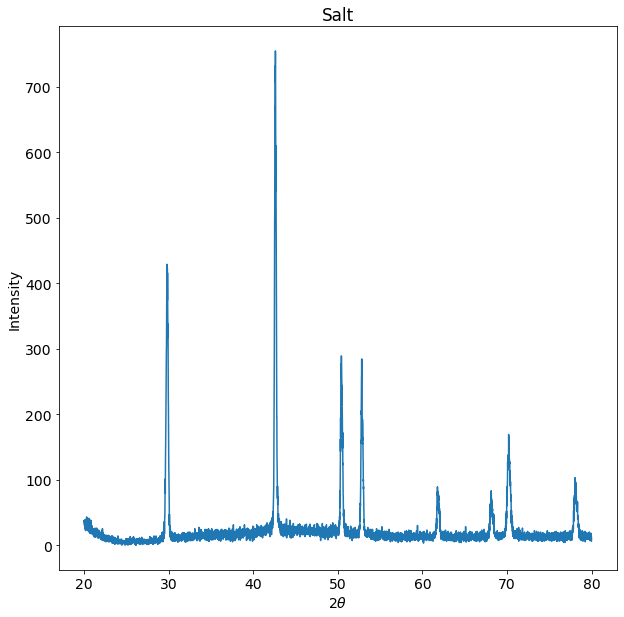

In [75]:
Salt_df_datamatrix = Salt_df.to_numpy() # Converts the Salt DataFrame to a NumPy array
Salt_2theta = np.array(Salt_df_datamatrix[:,0], dtype=np.float64) # Creates an array with 2theta
Salt_theta = np.array(Salt_df_datamatrix[:,0]/2, dtype=np.float64) # Creates an array with theta
Salt_intensity = np.array(Salt_df_datamatrix[:,1], dtype=np.float64) # creates an array with the intensities

fig = plt.figure(figsize=(10, 10)) # setting up the plotting background

c=fig.add_subplot(1,1,1)
plt.plot(Salt_2theta, Salt_intensity)
c.set_title('Salt')
plt.xlabel(r'$2\theta$')
plt.ylabel('Intensity')
plt.show()

8


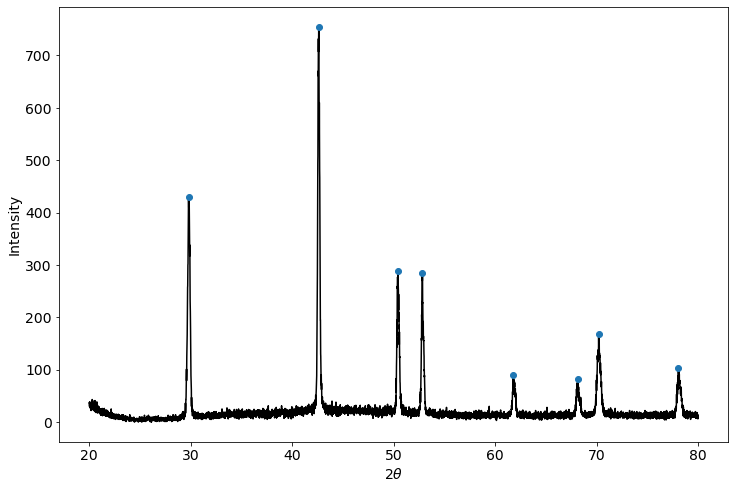

In [114]:
#Use SciPy to find peaks in the spectrum. It may find too many.
#We need to identify the correct ones and remove the incorrect ones.
#I played with different heights until I knew that peaks were identified. There should be a more robust way of doing this.
Salt_indexes, _ = scipy.signal.find_peaks(Salt_intensity, height = 50, distance = 60)
peak_count = len(Salt_indexes) # the number of peaks in the array
Salt_indexes_2theta = Salt_2theta[Salt_indexes]
print(peak_count)
#Salt_indexes_2theta = Salt_indexes*0.05+25.05
plt.plot(Salt_2theta, Salt_intensity, 'k')
plt.plot(Salt_2theta[Salt_indexes], Salt_intensity[Salt_indexes], 'o')
#plt.xlabel(r'$\textbf{time} (s)$')
plt.xlabel(r'$2\theta$')
#plt.xlim([44, 46])
plt.ylabel('Intensity')
plt.show()

In [115]:
Salt_indexes

array([ 978, 2261, 3041, 3283, 4177, 4813, 5019, 5804], dtype=int64)

In [ ]:
#Let's delete those first six points that are on the broad peak due to the amorphous sample holder.
Salt_indexes = np.delete(Salt_indexes, None)
Salt_indexes_2theta = np.delete(Salt_indexes_2theta, None)
plt.plot(Salt_2theta, Salt_intensity, 'k')
plt.plot(Salt_indexes_2theta, Salt_intensity[Salt_indexes], 'o')
#plt.xlabel(r'$\textbf{time} (s)$')
plt.xlabel(r'$2\theta$')

plt.ylabel('Intensity')
plt.show()

We need to figure out Given that there is constructive interference when all the miller indices are either odd or even. The table below shows the possible values.

$$\frac{d^2}{h^2+k^2+l^2} = \frac{\lambda^2}{4\sin^2{\theta}}$$

We can make a list of possible $h, k, l$ values for our salts since we know they are face-centered cubic (fcc) structure.

<table width="400">
    <th>$h$</th><th> $k$</th><th>$l$</th><th> $h^2+k^2+l^2$ </th>
    <tr>
    <td> 1 </td>
    <td> 1 </td>
    <td> 1 </td>
    <td> 3 </td> 
  </tr>
    <tr>
    <td> 2 </td>
    <td> 0 </td>
    <td> 0 </td>
    <td> 4 </td> 
  </tr>
  <tr>
    <td> 2 </td>
    <td> 2 </td>
    <td> 0 </td>
    <td> 8 </td> 
  </tr>
  <tr>
    <td> 3 </td>
    <td> 1 </td>
    <td> 1 </td>
    <td> 11 </td> 
  </tr>
  <tr>
    <td> 2 </td>
    <td> 2 </td>
    <td> 2 </td>
    <td> 12 </td> 
  </tr>
  <tr>
    <td> 3 </td>
    <td> 3 </td>
    <td> 1 </td>
    <td> 19 </td> 
  </tr>
  <tr>
    <td> 4 </td>
    <td> 2 </td>
    <td> 0 </td>
    <td> 20 </td> 
  </tr>
  <tr>
    <td> 4 </td>
    <td> 2 </td>
    <td> 2 </td>
    <td> 24 </td> 
  </tr>
</table>   
In this experiment we going to assume that $$\lambda = 1.5418$$. It is the average of the X_rays that are being passed throught the powder. 

In [116]:
# We can calculate the right handside of the above eqaution given the information we know right now let if be R
#RHS = (1.5418/2/sin(pi*Salt_indexes_2theta/360))**2#(1.5418/2/sin(pi*NaClindexes_2theta/360))
#print(Salt_indexes_2theta)
#print(RHS)

In [117]:
#Creating an array for the different hkl values corresponding to each angle above
#hkl = np.array([3, 4, 8, 11, 12, 16, 19, 20])

In [118]:
# finding the values for d**2 for each angle
#d_square = hkl*RHS
#print(d_square)

In [119]:
#Plotting the data to determine the slope.
# I am plotting L =(h^2+k^2+l^2) against X = sin^2(theta)
L = np.array([3, 4, 8, 11, 12, 16, 19,20])
x = (sin(pi*Salt_indexes_2theta/360))**2

In [120]:
Resolution = 0.01 # degrees

Delthi = 0.5*(Resolution*2*pi/360) # estimating the error
Del_x = Delthi*2*(sin(pi*Salt_indexes_2theta/360))*(cos(pi*Salt_indexes_2theta/360))
Del_y = Delthi*2*(sin(pi*Salt_indexes_2theta/360))*(cos(pi*Salt_indexes_2theta/360))*0

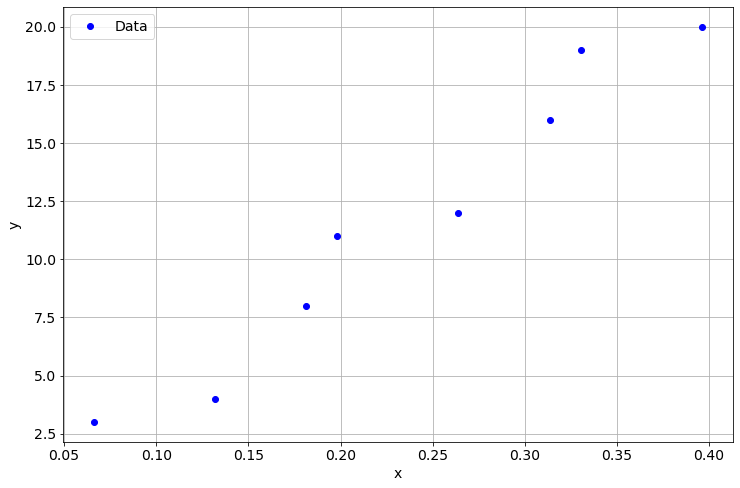

In [121]:
plt.plot(x, L, 'bo', label='Data')
plt.grid(True)
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [122]:
data = pd.DataFrame([x,L,Del_x,Del_y])
data = data.transpose()
data.columns=['x','L','Delta_x','Delta_y']
data

,x,L,Delta_x,Delta_y
0,0.066074,3.0,0.000043,0.0
1,0.132070,4.0,0.000059,0.0
2,0.181423,8.0,0.000067,0.0
3,0.197979,11.0,0.000070,0.0
4,0.263571,12.0,0.000077,0.0
5,0.313830,16.0,0.000081,0.0
6,0.330631,19.0,0.000082,0.0
7,0.396471,20.0,0.000085,0.0


In [134]:
df = data
#initial guesses for slope and intercept
m = 60#slope
b = 1#intercept

# create an uncertainty column for dx in the dataframe
#Funtion for fitting
def f_line(x, m, b):
    return m*x + b

In [135]:
fit_params, junk = curve_fit(f_line, x, L, (m, b),sigma = df['Delta_x'],absolute_sigma ='True')
print(fit_params,junk)

[55.37372055 -1.38042844] [[ 4.71850697e-08 -8.90769151e-09]
 [-8.90769151e-09  2.22119536e-09]]


In [136]:
x_fit = np.linspace(0, 30, 100)
y_fit = f_line(x_fit, fit_params[0], fit_params[1])

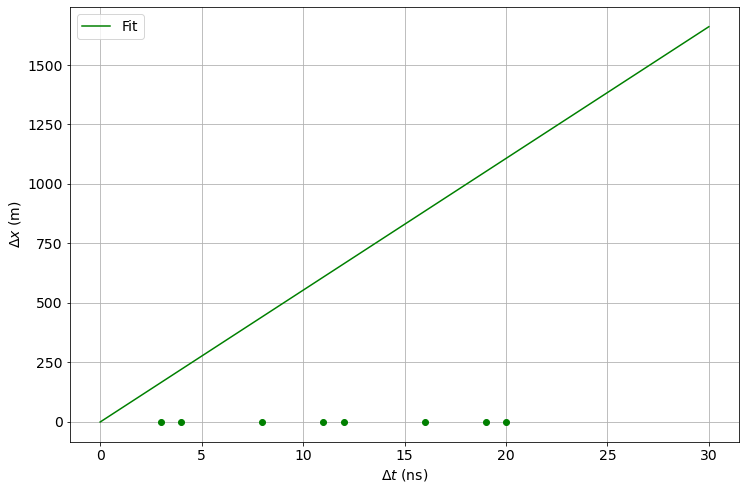

In [137]:
plt.errorbar(L,x , xerr=0.00, yerr=df['Delta_x'],
            marker='o', color='green', mec='green', mfc='green',
            linestyle='none')
plt.plot(x_fit, y_fit, '-g',label='Fit')
plt.xlabel('$\Delta t$ (ns)')
plt.ylabel('$\Delta x$ (m)')
plt.legend(loc=0)
plt.grid(True)
plt.show()

In [125]:
N = 7
Delta = N*sum((x**2)) - (sum(x)**2)

In [126]:
A = (((sum((x)**2))*(sum(L)))- ((sum(x))*(sum(L*(x)))))/Delta

In [127]:
B = ((N*(sum((L)*(x))))-((sum(x))*(sum(L))))/Delta

In [128]:
Yi = A + B*x

In [129]:
SttdY = np.sqrt((1/(N-2)*sum((L - A - B*x)**2)))
SttdA = SttdY*np.sqrt((sum(x)**2)/Delta)
SttdB = SttdY*np.sqrt(N/Delta)

In [130]:
print(SttdA)

print(SttdB)

16.265094343085753
22.865201576569202


In [132]:
B

78.09508762089293

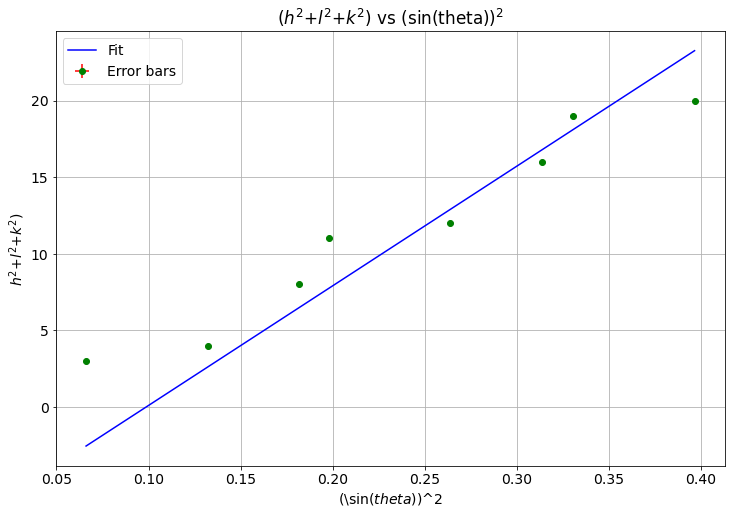

In [157]:
plt.errorbar(x,L , xerr=data['Delta_x'], yerr=data['Delta_y'],
            marker='o', color='red', mec='green', mfc='green',
            linestyle='none',label='Error bars')
#plt.plot(data['delta_t(ns)'], data['delta_x(m)'], 'rs', label='Data')
plt.plot(x, Yi, '-b',label='Fit')
plt.title('($h^2$+$l^2$+$k^2)$ vs $(\sin($theta$))^2$')
plt.xlabel('(\sin($theta$))^2')
plt.ylabel('$h^2$+$l^2$+$k^2)$')
plt.legend(loc=0)
plt.grid(True)
plt.savefig('plot.png')
plt.show()